In [1]:
from LIMxCMBL.init import *

In [5]:
from tqdm import trange

  0%|          | 0/100 [00:00<?, ?it/s]

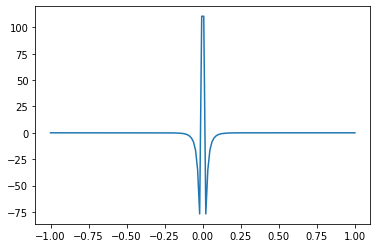

  1%|          | 1/100 [00:00<00:10,  9.45it/s]

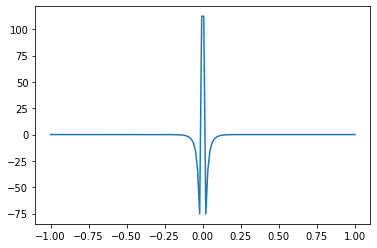

  2%|▏         | 2/100 [00:00<00:10,  9.58it/s]

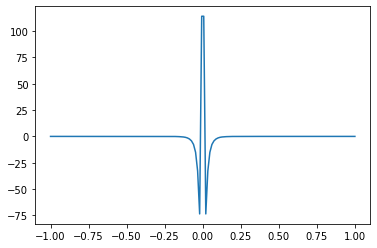

  3%|▎         | 3/100 [00:00<00:10,  9.59it/s]

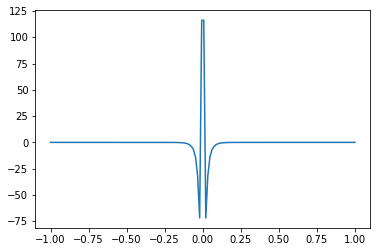

  4%|▍         | 4/100 [00:00<00:10,  9.45it/s]

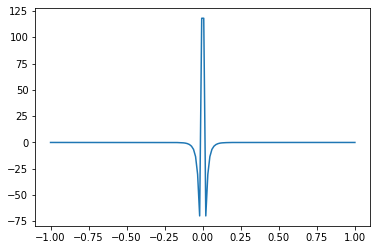

  5%|▌         | 5/100 [00:00<00:10,  9.42it/s]

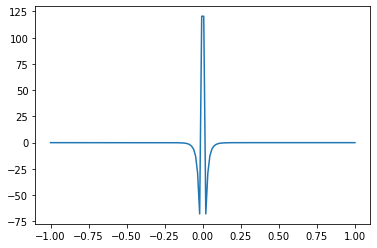

  6%|▌         | 6/100 [00:00<00:10,  9.35it/s]

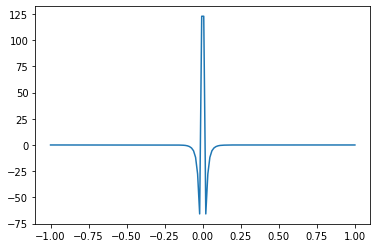

  7%|▋         | 7/100 [00:00<00:09,  9.35it/s]

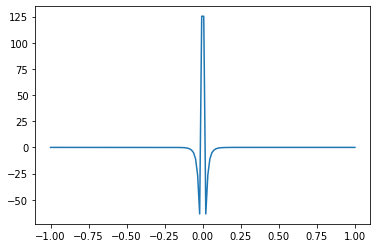

  8%|▊         | 8/100 [00:00<00:09,  9.43it/s]

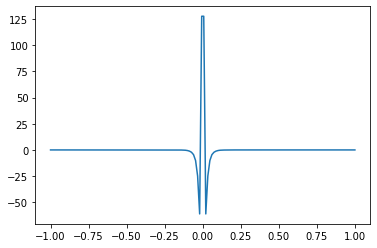

  9%|▉         | 9/100 [00:00<00:09,  9.49it/s]

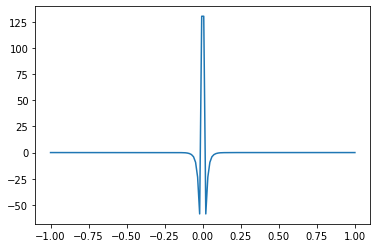

 10%|█         | 10/100 [00:01<00:09,  9.55it/s]

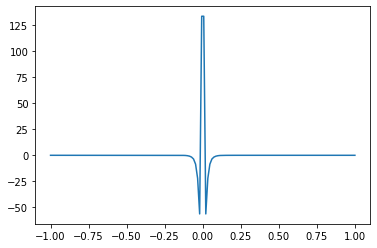

 11%|█         | 11/100 [00:01<00:09,  9.58it/s]

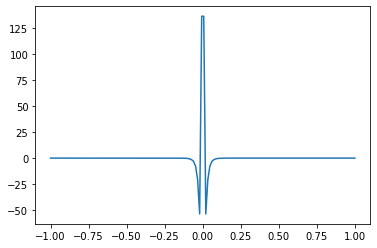

 12%|█▏        | 12/100 [00:01<00:09,  9.61it/s]

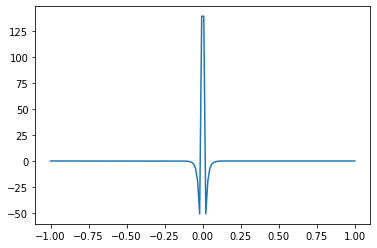

 13%|█▎        | 13/100 [00:01<00:09,  9.61it/s]

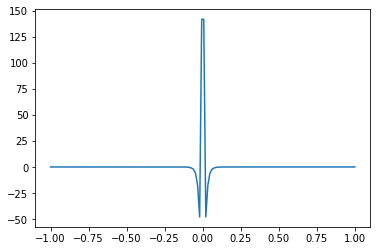

 14%|█▍        | 14/100 [00:01<00:09,  9.52it/s]

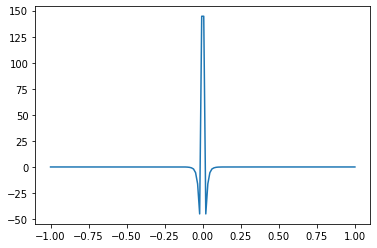

 15%|█▌        | 15/100 [00:01<00:10,  8.22it/s]

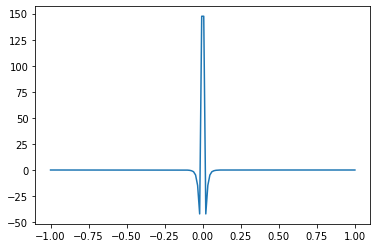

 16%|█▌        | 16/100 [00:01<00:09,  8.52it/s]

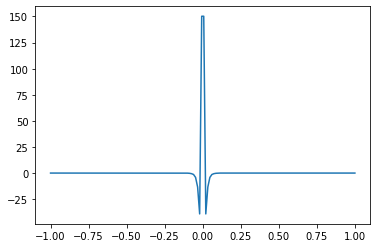

 17%|█▋        | 17/100 [00:01<00:09,  8.83it/s]

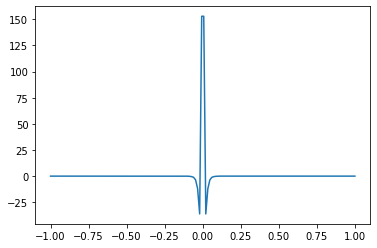

 18%|█▊        | 18/100 [00:01<00:09,  9.06it/s]

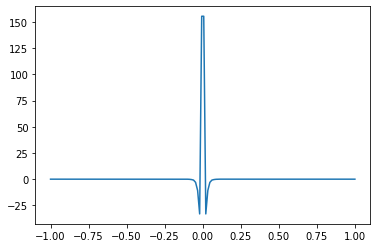

 19%|█▉        | 19/100 [00:02<00:08,  9.22it/s]

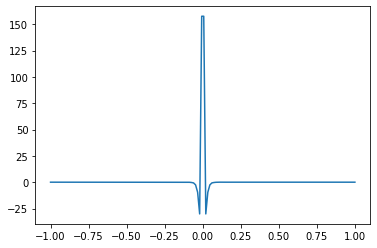

 20%|██        | 20/100 [00:02<00:08,  9.35it/s]

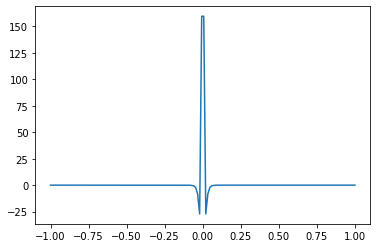

 21%|██        | 21/100 [00:02<00:08,  9.42it/s]

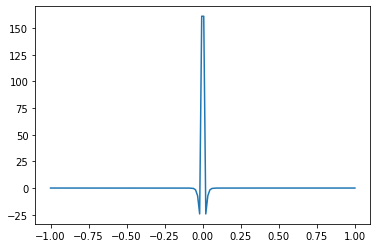

 22%|██▏       | 22/100 [00:02<00:08,  9.51it/s]

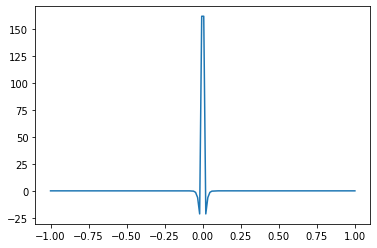

 23%|██▎       | 23/100 [00:02<00:08,  9.53it/s]

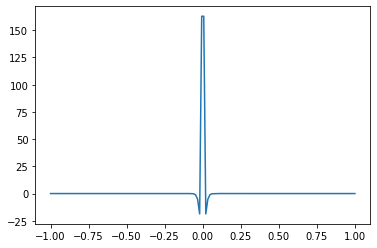

 24%|██▍       | 24/100 [00:02<00:07,  9.54it/s]

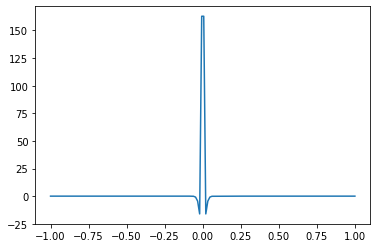

 25%|██▌       | 25/100 [00:02<00:07,  9.56it/s]

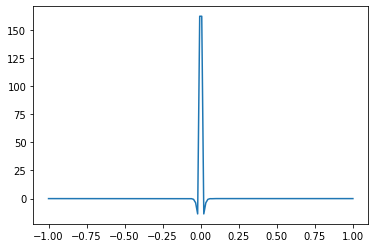

 26%|██▌       | 26/100 [00:02<00:07,  9.66it/s]

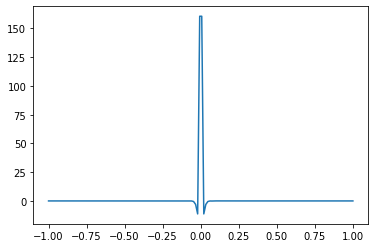

 27%|██▋       | 27/100 [00:02<00:07,  9.75it/s]

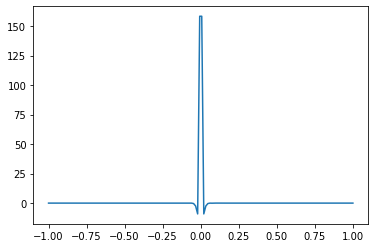

 28%|██▊       | 28/100 [00:02<00:07,  9.78it/s]

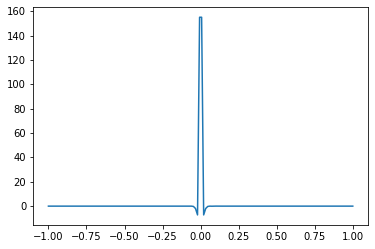

 29%|██▉       | 29/100 [00:03<00:07,  9.60it/s]

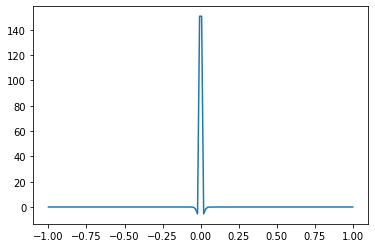

 30%|███       | 30/100 [00:03<00:07,  9.50it/s]

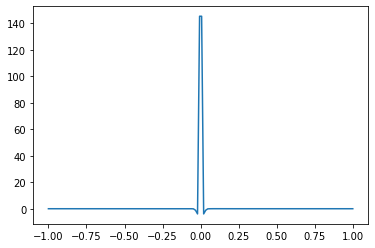

100%|██████████| 100/100 [00:03<00:00, 30.15it/s]

31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [15]:
oup = np.zeros((len(ells), len(chibs), len(deltas)), dtype=np.float128)
for ell_idx in trange(len(ells)):
    try:
        ell = ells[ell_idx]
        oup_fname = '/scratch/users/delon/LIMxCMBL/dkparp_integral/ell_%.8f.npy'%(ell)
        oup[ell_idx] = np.load(oup_fname)
        plt.plot(deltas, oup[ell_idx][42])
        plt.show()
        for chib_idx in range(len(chibs)):
            assert(np.allclose(oup[ell_idx][chib_idx], oup[ell_idx][chib_idx][::-1]))
    except:
        print(ell_idx)
#     print(ell)
